In [102]:
import os
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize results from 9 diseases

In [103]:
filenames = sorted(glob("../results/final_10_splits_9_diseases/*.csv"))
all_dfs = pd.DataFrame()
for fname in filenames:
    disease = os.path.basename(fname).replace('benchmark_results_', '').replace('.csv','').replace('_', '\n')
    df = pd.read_csv(fname)
    df['disease'] = disease
    all_dfs = pd.concat([all_dfs, df])
all_dfs

,test_name,ndgc,time,split_name,ranks,disease
0,Arthritis_42_radial_min,0.987671,1.040053,generated_42,"0,1,2,3,4,7",Arthritis
1,Arthritis_42_boundary_min,0.681339,1.093436,generated_42,"1,2,5,9,12,24",Arthritis
2,Arthritis_45_radial_min,1.000000,0.948012,generated_45,"0,1,2,3,4,5",Arthritis
3,Arthritis_45_boundary_min,0.858655,1.087566,generated_45,"0,1,4,8,10,16",Arthritis
4,Arthritis_55_radial_min,1.000000,0.931252,generated_55,"0,1,2,3,4,5",Arthritis
...,...,...,...,...,...,...
15,Ulcerative_colitis_18_boundary_min,0.431573,1.245113,generated_18,"1,21,29,60,71,104,232,350,410,530,585,768,830,846",Ulcerative\ncolitis
16,Ulcerative_colitis_22_radial_min,0.420140,1.055769,generated_22,"1,19,64,77,163,166,214,272,386,489,584,607,709...",Ulcerative\ncolitis
17,Ulcerative_colitis_22_boundary_min,0.420140,1.233133,generated_22,"1,19,64,77,163,166,214,272,386,489,584,607,709...",Ulcerative\ncolitis
18,Ulcerative_colitis_157_radial_min,0.389721,1.061330,generated_157,"13,16,20,37,42,77,154,260,331,354,409,559,601,791",Ulcerative\ncolitis


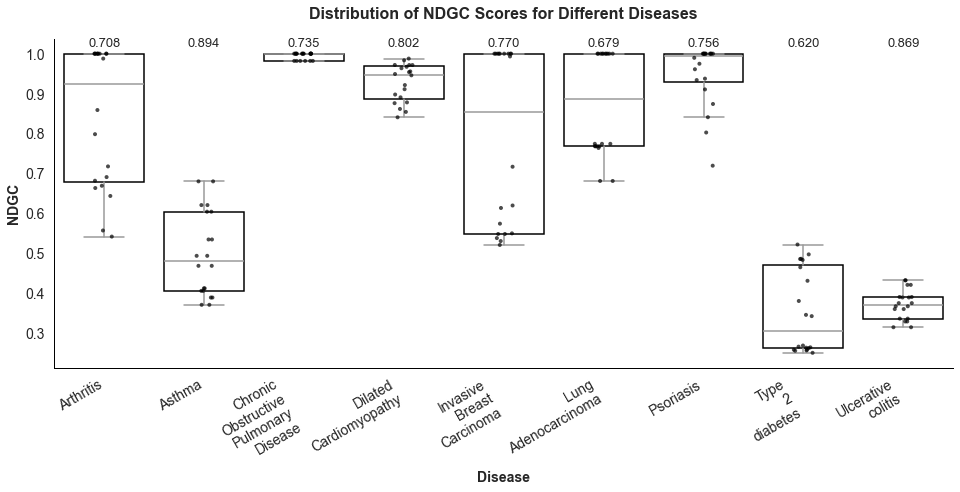

In [104]:
# Conductance values
conductances = {'Arthritis': 0.708, 'Asthma': 0.894, 'Chronic\nObstructive\nPulmonary\nDisease': 0.735,
       'Dilated\nCardiomyopathy': 0.802, 'Invasive\nBreast\nCarcinoma': 0.77,
       'Lung\nAdenocarcinoma': 0.679, 'Psoriasis': 0.756, 'Type\n2\ndiabetes': 0.62,
       'Ulcerative\ncolitis': 0.869}
show_diseases = list(conductances.keys()) #['Chronic\nObstructive\nPulmonary\nDisease', 'Psoriasis']
conductances = {k: v for k, v in conductances.items() if k in show_diseases}
subset_df = all_dfs[all_dfs['disease'].isin(show_diseases)]

# Set the figure size and style for Nature-like aesthetics
sns.set(style="white", context="notebook", font="Arial", rc={"axes.edgecolor": "black", "axes.linewidth": 1})

plt.figure(figsize=(len(show_diseases)*1.5, 7))

# Create the boxplot with black borders
boxplot = sns.boxplot(data=subset_df, x='disease', y='ndgc', showfliers=False,
                      color='white',  # White fill
                      linewidth=1.5)  # Border width

# Add black borders manually for all boxes
for patch in boxplot.patches:
    patch.set_edgecolor('black')  # Set border color to black
    patch.set_linewidth(1.5)      # Set border width

# Add data points with a jittered stripplot for better visibility
sns.stripplot(data=subset_df, x='disease', y='ndgc',
              color='black', size=4, jitter=True, alpha=0.7)

# Beautify the axes labels and title
plt.xlabel('Disease', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('NDGC', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Distribution of NDGC Scores for Different Diseases', fontsize=16, fontweight='bold', fontname='Arial', pad=20)

# Remove unnecessary spines for a clean look
sns.despine(top=True, right=True, left=False, bottom=False)

# Add conductance values above each box at y=1.01
for i, (disease, cond) in enumerate(conductances.items()):
    plt.text(i, 1.01, f'{cond:.3f}', ha='center', va='bottom', fontsize=13, fontname='Arial')

# Adjust tick label size and rotation for clarity
plt.xticks(fontsize=14, fontname='Arial', rotation=30, ha='right')
plt.yticks(fontsize=14, fontname='Arial')

plt.savefig('ndgc_9_diseases.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
